In [1]:
#import packages

import pandas as pd
import numpy as np
import urllib.request
from PIL import Image, ImageFilter
from skimage import data, io, filters
import matplotlib.pyplot as plt
from ismember import ismember
from skimage.color import rgb2gray,label2rgb
from PIL import ImageFont
from skimage.measure import label,regionprops_table
import seaborn as sns
from skimage.segmentation import slic

### Exercise 1: Images: load, display and colours

1. Retrieving 2 images from urls. Grayscale image (image1:'blood_cells') and a colour image (image2:'monet')

In [3]:
image1 = urllib.request.urlretrieve('http://upload.wikimedia.org/wikipedia/commons/8/82/SEM_blood_cells.jpg','blood_cells')
image2 = urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/5/54/Claude_Monet%2C_Impression%2C_soleil_levant.jpg','monet')

2. Visualization of the 2 images

In [4]:
img1 = Image.open('blood_cells')
#img1.show()
img2 = Image.open('monet')
#img2.show()

Validation of format, size and mode of the images

In [5]:
print(img1.format, img1.size, img1.mode)
print(img2.format, img2.size, img2.mode)

JPEG (1800, 2239) RGB
JPEG (1600, 1245) RGB


The images have to be converted to arrays in order to be able to modify values of the images 

In [6]:
#convert img1 to array ia1 and img2 to ai2

ia1 = np.array(img1)
ia2 = np.array(img2)
print(ia1.shape)
print(ia2.shape)

(2239, 1800, 3)
(1245, 1600, 3)


Visualization of values from a slice on ia1

In [7]:
ia1[0:5,0:5]

array([[[142, 142, 142],
        [137, 137, 137],
        [136, 136, 136],
        [142, 142, 142],
        [142, 142, 142]],

       [[138, 138, 138],
        [137, 137, 137],
        [136, 136, 136],
        [140, 140, 140],
        [139, 139, 139]],

       [[136, 136, 136],
        [135, 135, 135],
        [136, 136, 136],
        [141, 141, 141],
        [141, 141, 141]],

       [[139, 139, 139],
        [132, 132, 132],
        [135, 135, 135],
        [143, 143, 143],
        [145, 145, 145]],

       [[138, 138, 138],
        [129, 129, 129],
        [132, 132, 132],
        [137, 137, 137],
        [141, 141, 141]]], dtype=uint8)

Display of images after being converted to arrays

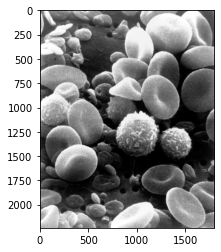

In [8]:
plt.imshow(ia1)

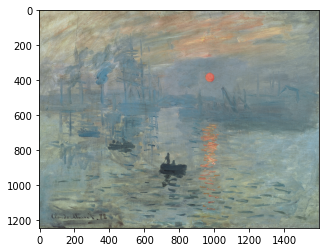

In [9]:
plt.imshow(ia2)

3. Change values of the images

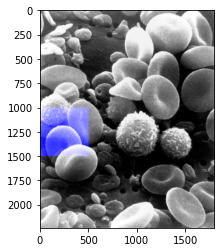

In [10]:
ia1[1000:1500,0:500,2]=255
plt.imshow(ia1)

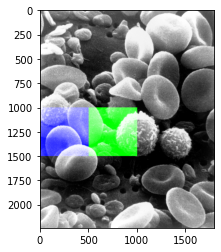

In [11]:
ia1[1000:1500,500:1000,1]=255
plt.imshow(ia1)

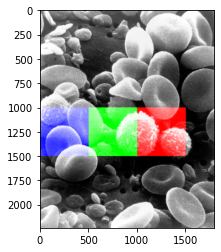

In [12]:
ia1[1000:1500,1000:1500,0]=255
plt.imshow(ia1)

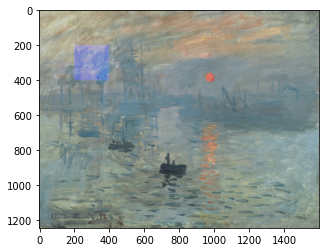

In [13]:
ia2[200:400,200:400,2]=200
plt.imshow(ia2)

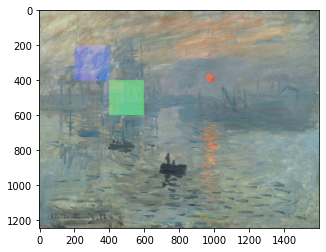

In [14]:
ia2[400:600,400:600,1]=200
plt.imshow(ia2)

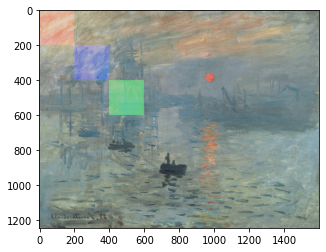

In [15]:
ia2[0:200,0:200,0]=225
plt.imshow(ia2)

Modifying the values on the channel in different coordenates of the matrix shows how the colours on the image can be changed.

### Exercise 2: Basic image manipulation

1. Segmentation of image into regions

   To be able to analyse the regions first it has to be converted to a grayscale:

None (1800, 2239) L


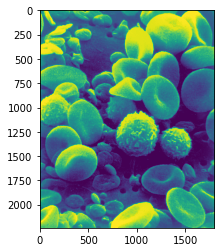

In [16]:
#change from rgb to grayscale using image.convert()

ig1 =img1.convert('L')
plt.imshow(ig1)
print(ig1.format, ig1.size, ig1.mode)

As the previous change was made directly in the image it has to be converted again to an array

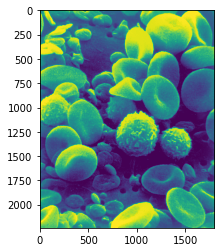

In [17]:
iag1= np.array(ig1)
plt.imshow(iag1)

The first segmentation is done via threshold. The Otsu threshold is 120. Therefore two threshold were added to make a constrast which can be seen on the display of the new images.

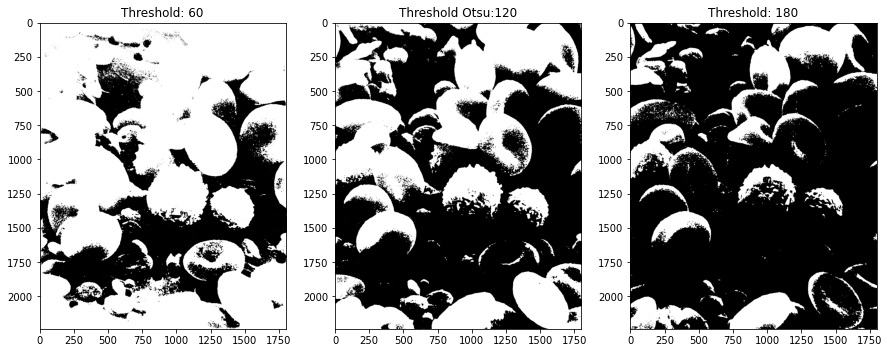

In [18]:
tiag= filters.threshold_otsu(iag1)
tiag_ = (iag1 > tiag)
tiag_1 = (iag1 > 60)
tiag_2 = (iag1 > 180)

f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(tiag_1,cmap= 'gray')
ax1.set_title('Threshold: 60')
ax2.imshow(tiag_,cmap='gray')
ax2.set_title('Threshold Otsu:'+str(tiag))
ax3.imshow(tiag_2,cmap= 'gray')
ax3.set_title('Threshold: 180')
plt.show()

A second segmentation was done using the label function obtaining a large amount of different labels.

In [19]:
ial= label(iag1,return_num=True,connectivity=2)
ial

(array([[      1,       2,       3, ...,    1586,    1586,    1587],
        [   1588,       2,       3, ...,    2781,    2781,    2782],
        [   2783,    2784,       3, ...,    4049,    2782,    2781],
        ...,
        [2457893, 2457894, 2456931, ..., 2458868, 2457891, 2458869],
        [2457894, 2458870, 2458871, ..., 2459897, 2458869, 2459898],
        [2459899, 2459900, 2458872, ..., 2458869, 2460912, 2460913]]),
 2460913)

Display of the information related to the regions labelled on the previous function

In [20]:
prop=regionprops_table(iag1,properties=['label','area','bbox','convex_area','bbox_area',
             'major_axis_length', 'minor_axis_length', 'eccentricity','perimeter'])

In [21]:
iag1_prop= pd.DataFrame(prop)
iag1_prop

,label,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity,perimeter
0,1,25917,439,163,1928,1728,1872842,2330285,1881.807375,1041.499589,0.832878,13042.236934
1,2,15493,436,159,1943,1731,1906820,2369004,1945.788406,1128.947424,0.814474,5057.789427
2,3,7543,448,138,1932,1729,1897770,2361044,1946.834687,1162.705180,0.802071,914.193001
3,4,25644,434,137,1953,1740,1957925,2434957,1975.145547,1188.756034,0.798604,13823.454142
4,5,32167,431,119,1991,1749,2059256,2542800,1986.733389,1239.382706,0.781561,19507.199846
...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,10078,0,0,2239,1781,3708817,3987659,3501.179444,2202.243122,0.777405,4769.767999
251,252,11430,0,0,2239,1684,3119414,3770476,3556.955056,2207.832904,0.784041,6673.827053
252,253,8932,0,0,2239,1684,3055437,3770476,3334.262587,2269.703572,0.732542,4509.400467
253,254,11350,0,0,2239,1658,3023606,3712262,3554.341166,2271.663509,0.769104,7417.520487


In [22]:
lareas = ismember(iag1,(iag1_prop['area']>1000))

A thrid segmentation was made using the slic function which applies k-means clustering.
A small number of segments (50) was choose to improve facilitate the visualization of the regions labelled with this method.

In [23]:
regs = slic(img1,start_label=1, n_segments=50, compactness=10)
regs

array([[ 1,  1,  1, ...,  3,  3,  3],
       [ 1,  1,  1, ...,  3,  3,  3],
       [ 1,  1,  1, ...,  3,  3,  3],
       ...,
       [29, 29, 29, ..., 26, 26, 26],
       [29, 29, 29, ..., 26, 26, 26],
       [29, 29, 29, ..., 26, 26, 26]])

Display of the image using 6 different colors that are assigned to different regions (as labels> nºcolors, the color are looped on the list of labels).

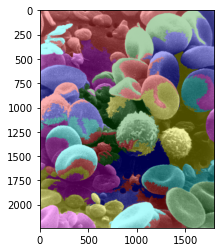

In [24]:
#label2rgb coloured the image with given colors looping over the labels gotten on the slic function

plt.imshow(label2rgb(regs, iag1, bg_label=0,kind='overlay',colors=['red','green','blue','cyan','magenta','yellow']))

2. Common transformation of images
   Rotation, transposition and flip were applied to the image an display in the graphic below.

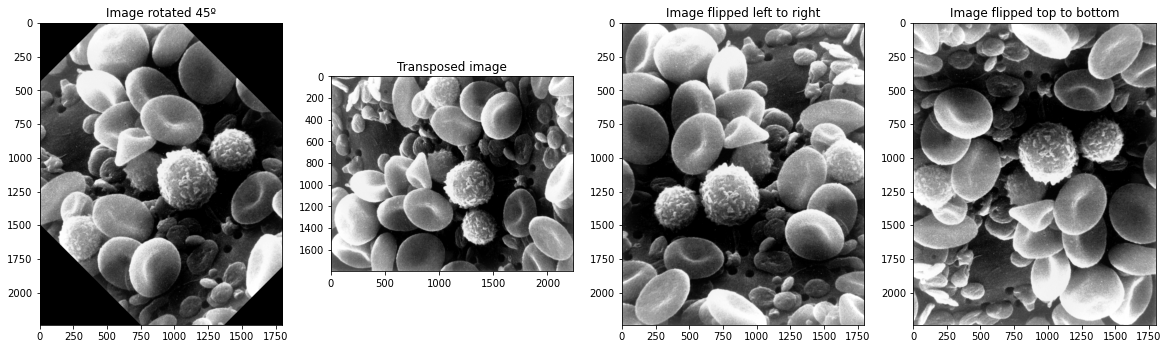

In [25]:
f, (ax1, ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))
ax1.imshow(img1.rotate(45))
ax1.set_title('Image rotated 45º')
ax2.imshow(img1.transpose(5))
ax2.set_title('Transposed image')
ax3.imshow(img1.transpose(0))
ax3.set_title('Image flipped left to right')
ax4.imshow(img1.transpose(1))
ax4.set_title('Image flipped top to bottom')
plt.show()